In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def moving_average_forecast(data: list, window_size: int, pred_horizon: int = 1) -> list:
    if window_size <= 0 or not isinstance(window_size, int):
        raise ValueError("window_size must be a positive integer.")
    if pred_horizon <= 0 or not isinstance(pred_horizon, int):
        raise ValueError("pred_horizon must be a positive integer.")
    if not isinstance(data, list):
        raise ValueError("data must be a list.")

    forecasts = []

    for _ in range(pred_horizon):
        recent_values = (data + forecasts)[-window_size:]
        forecast = round(sum(recent_values) / len(recent_values), 2)
        # print(f"{recent_values}: {forecast}")
        forecasts.append(forecast)

    return forecasts


In [32]:
demand_mean = 100
demand_std = 15
control_horizon = 1
demand_data = list()
demand_factor = dict()

prediction_horizon = 15
average_window = 10

for i in range(364):
    if i!=1:
        demand_data+=[round(k,2) for k in np.random.normal(demand_mean,demand_std, control_horizon).tolist()]
    
    if i<=1:
        forecasts = moving_average_forecast(data=[demand_data[0]], window_size=average_window, pred_horizon=prediction_horizon)
    else:
        forecasts = moving_average_forecast(data=demand_data[max(0,i-average_window):i], window_size=average_window, pred_horizon=prediction_horizon)
        
    known_pred_data = demand_data + forecasts
    demand_factor[i] = known_pred_data[:364] + [forecasts[-1]]*max((364-len(known_pred_data)), 0)

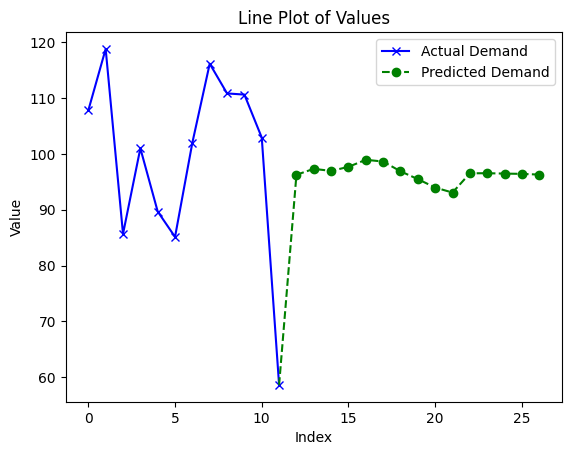

In [39]:
n = 12

# Plot the values
plt.plot(range(n), demand_data[:n], marker='x', linestyle='-', color='b', label="Actual Demand")

plt.plot([n-1, n], demand_factor[n][n-1:n+1], linestyle='--', color='g')

plt.plot(range(n, n+prediction_horizon), demand_factor[n][n:n+prediction_horizon], marker='o', linestyle='--', color='g', label="Predicted Demand")

# Labels and title
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line Plot of Values")
plt.legend()

# Show the plot
plt.show()
